In [2]:
import json
import pandas as pd
import numpy as np
import re

In [3]:
file_dir = '/Users/victoralvarado/Desktop/class_folder/Movies-ETL'

In [4]:
with open(f'{file_dir}/wikipedia-movies.json', mode='r') as file:
    wiki_movies_raw = json.load(file)


In [5]:
movies_metadata = pd.read_csv('movies_metadata.csv', low_memory=False)
ratings = pd.read_csv('ratings.csv')

In [6]:
ratings.sample(n=5)

,userId,movieId,rating,timestamp
2861099,29803,1247,3.0,1249874136
11673611,121083,3943,5.0,987782290
22688528,235772,1378,3.5,1210476388
23837661,247544,2028,5.0,974832591
18918135,196434,4361,4.5,1225597499


In [7]:
kaggle_metadata = pd.read_csv(f'movies_metadata.csv', low_memory=False)
ratings = pd.read_csv(f'ratings.csv')

In [8]:
kaggle_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [9]:
# ID NEEDS TO BE NUMERIC
# BUDGET NEEDS TO BE NUMERIC
# VIDEO SHOULD BE BOOLEAN
#POPULARITY NEEDS TO BE NUMERIC
# ADULT = BOOLEAN
# RELEASE_DATE = DATETIME

#We'll just go down the list and convert the data types for each of the six columns that need to be converted.

#Before we convert the "adult" and "video" columns, we want to check that all the values are either True or False.

kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

In [10]:
#Clearly, we have some bad data in here. Let's remove it.

#Remove Bad Data
#To remove the bad data, use the following:

kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#Take a closer look at the three movies that appear to have corrupted data:

#Somehow the columns got scrambled for these three movies.

#How do we fix the data here?

#Ideally, we'd want to be able to unscramble the rows and recover the data. But since we don't know what caused the data to be scrambled, 
#it's also possible that even if we got all the data into the right columns, the data would still be corrupt.

#The biggest concern is that none of the data in these rows looks like an imdb_id. Since that's missing, 
#there's no amount of rearranging that will make these rows into good data. We're just going to have to drop them.

#In fact, since we probably don't want to include adult movies in the hackathon dataset, 
#we'll only keep rows where adult is False, and then drop the "adult" column.

In [12]:
#The following code will keep rows where the adult column is False, and then drop the adult column.

kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult',axis='columns')

In [13]:
#Next, we'll look at the values of the video column:

kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [14]:
#Great, there are only False and True values. We can convert video fairly easily.
kaggle_metadata['video'] == 'True'


0        False
1        False
2        False
3        False
4        False
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Name: video, Length: 45454, dtype: bool

In [15]:
#The above code creates the Boolean column we want. We just need to assign it back to video:

kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'

In [16]:
#For the numeric columns, we can just use the to_numeric() method from Pandas. 
#We'll make sure the errors= argument is set to 'raise', so we'll know if there's any data that can't be converted to numbers.

kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [17]:
#This code runs without errors, so everything converted fine.



In [18]:
#Finally, we need to convert release_date to datetime. Luckily, Pandas has a built-in function for that as well: to_datetime().
#Since release_date is in a standard format, to_datetime() will convert it without any fuss.

kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])


In [19]:
#Lastly, we'll take a look at the ratings data. We'll use the info() method on the DataFrame. 
#Since the ratings dataset has so many rows, we need to set the null_counts option to True.

ratings.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


/var/folders/5g/99y1_mx51lv8jv_cy6tg659m0000gn/T/ipykernel_45297/227424168.py:4: FutureWarning: null_counts is deprecated. Use show_counts instead
  ratings.info(null_counts=True)


In [20]:
#For our own analysis, we won't be using the timestamp column; however, we will be storing the rating data as its own table in SQL,
#so we'll need to convert it to a datetime data type. From the MovieLens documentation, the timestamp 
#is the number of seconds since midnight of January 1, 1970.

#IMPORTANT
#Storing time values as a data type is difficult, and there are many, many standards out there for time values. 
#Some store time values as text strings, like the ISO format "1955-11-05T12:00:00," but then calculating the difference between two 
#time values is complicated and computationally expensive. The Unix time standard stores points of time as integers, 
#specifically as the number of seconds that have elapsed since midnight of January 1, 1970. This is known as the Unix epoch. 
#There are other epochs in use, but the Unix epoch is by far the most widespread.

In [21]:
#We'll specify in to_datetime() that the origin is 'unix' and the time unit is seconds.

pd.to_datetime(ratings['timestamp'], unit='s')


0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [22]:
#These dates don't seem outlandish—the years are within expected bounds, and there appears to be some consistency from one entry to the next. 
#Since the output looks reasonable, assign it to the timestamp column.

ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')


In [23]:
#Finally, we'll look at the statistics of the actual ratings and see if there are any glaring errors. A quick, easy way to do 
#this is to look at a histogram of the rating distributions, and then use the describe() method to print out some stats on 
#central tendency and spread.

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

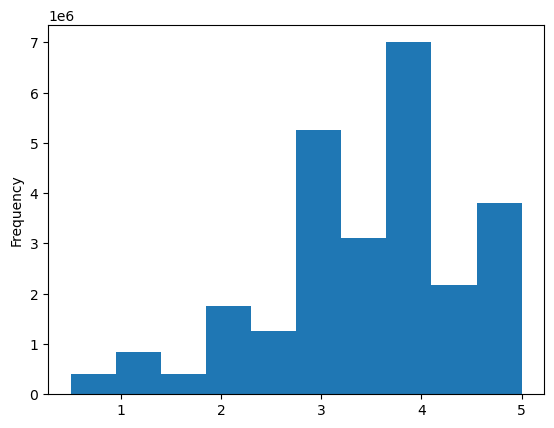

In [24]:
pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()

In [25]:
#That seems to make sense. People are more likely to give whole number ratings than half, which explains the spikes in the histogram. 
#The median score is 3.5, the mean is 3.53, and all the ratings are between 0 and 5.



In [26]:
movies_df = pd.merge(wiki_movies_df, kaggle_metadata, on='imdb_id', suffixes=['_wiki','_kaggle'])


NameError: name 'wiki_movies_df' is not defined